In [65]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
     

df = pd.DataFrame()
     

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [66]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

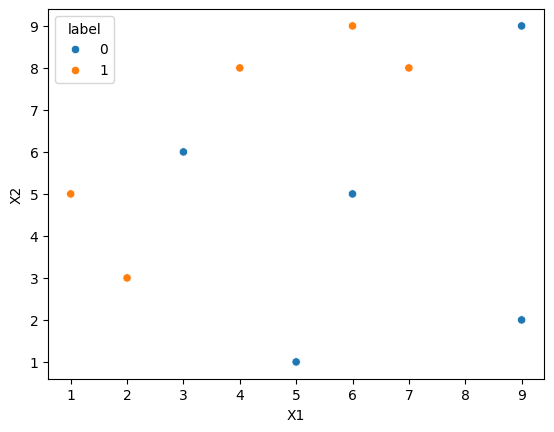

In [67]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])
     

In [68]:
df['weights'] = 1/df.shape[0]

In [69]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [72]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [73]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

In [74]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [75]:
dt1.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [76]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

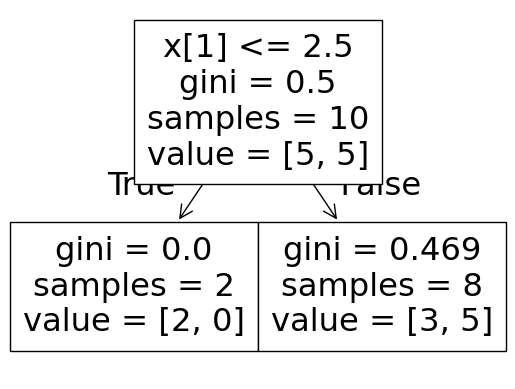

In [77]:
plot_tree(dt1) 

<Axes: >

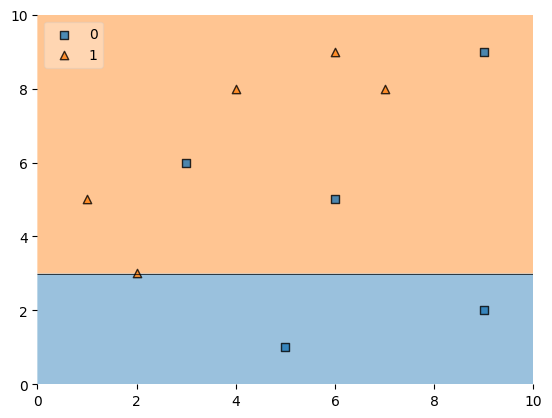

In [78]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [79]:
df['y_pred'] = dt1.predict(X)

In [80]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [81]:
# Step 2 Function to calculate the model weight based on error
def calculate_model_weight(error):

    return 0.5 * np.log((1 - error) / (error))

In [86]:
# Step 3 - Calculate model weights
a = calculate_model_weight(0.3)
a

np.float64(0.42364893019360184)

In [90]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [91]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [92]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [102]:
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [103]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [105]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [106]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [107]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [156]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [157]:
index_values = create_new_dataset(df)

index_values

[4, 4, 4, 1, 6, 8, 5, 6, 2, 7]

In [158]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [159]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1


In [160]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [161]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [162]:
dt2.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.625, 0.5, '  False')]

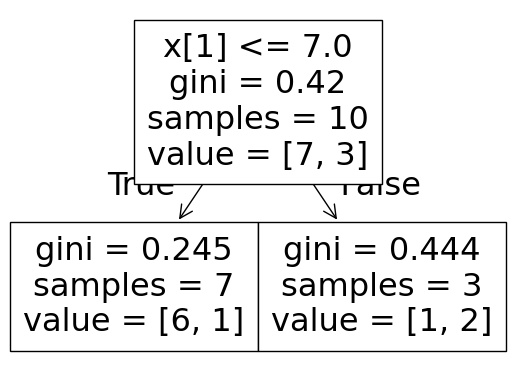

In [163]:
plot_tree(dt2)

<Axes: >

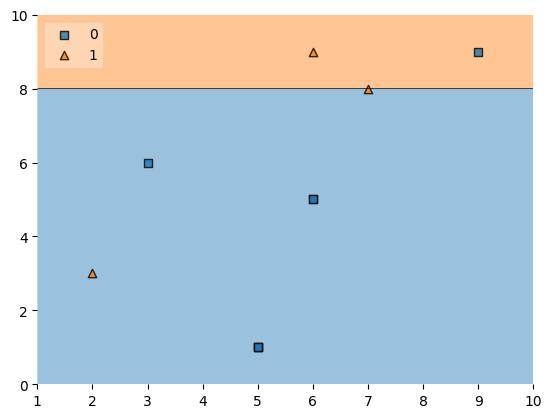

In [164]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [165]:
second_df['y_pred'] = dt2.predict(X)

In [166]:
second_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,0
1,2,3,1,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,1
5,6,9,1,0.1,1
6,6,5,0,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,1


In [167]:
a2 = calculate_model_weight(0.2)
a2

np.float64(0.6931471805599453)

In [168]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.69314):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
     

In [169]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [170]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.050000
4,5,1,0,0.1,0,0.050000
4,5,1,0,0.1,0,0.050000
1,2,3,1,0.1,0,0.199999
6,6,5,0,0.1,0,0.050000
8,9,9,0,0.1,1,0.199999
5,6,9,1,0.1,1,0.050000
6,6,5,0,0.1,0,0.050000
2,3,6,0,0.1,0,0.050000
7,7,8,1,0.1,1,0.050000


In [171]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [172]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.050000,0.062500
4,5,1,0,0.1,0,0.050000,0.062500
4,5,1,0,0.1,0,0.050000,0.062500
1,2,3,1,0.1,0,0.199999,0.249998
6,6,5,0,0.1,0,0.050000,0.062500
8,9,9,0,0.1,1,0.199999,0.249998
5,6,9,1,0.1,1,0.050000,0.062500
6,6,5,0,0.1,0,0.050000,0.062500
2,3,6,0,0.1,0,0.050000,0.062500
7,7,8,1,0.1,1,0.050000,0.062500


In [173]:
second_df['nomalized_weights'].sum()

np.float64(1.0)

In [174]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
     

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
     

second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.062500,0.000000,0.062500
4,5,1,0,0.1,0,0.062500,0.062500,0.125001
4,5,1,0,0.1,0,0.062500,0.125001,0.187501
1,2,3,1,0.1,0,0.249998,0.187501,0.437500
6,6,5,0,0.1,0,0.062500,0.437500,0.500000
8,9,9,0,0.1,1,0.249998,0.500000,0.749998
5,6,9,1,0.1,1,0.062500,0.749998,0.812499
6,6,5,0,0.1,0,0.062500,0.812499,0.874999
2,3,6,0,0.1,0,0.062500,0.874999,0.937500
7,7,8,1,0.1,1,0.062500,0.937500,1.000000


In [183]:
index_values = create_new_dataset(second_df)
     
third_df = second_df.iloc[index_values,[0,1,2,3]]  

third_df

,X1,X2,label,weights
2,3,6,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
4,5,1,0,0.1
4,5,1,0,0.1


In [184]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<Axes: >

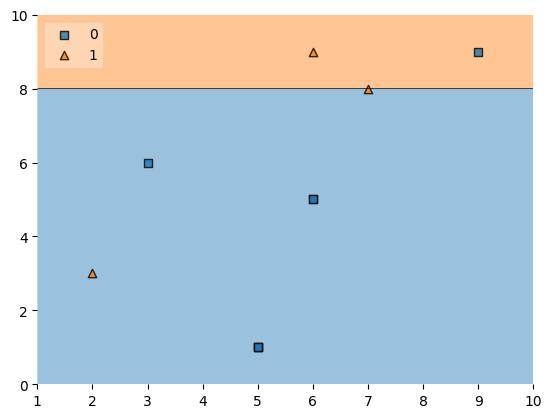

In [185]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [186]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,1
6,6,5,0,0.1,1
5,6,9,1,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,1


In [187]:
a3 = calculate_model_weight(0.3)
a3

np.float64(0.42364893019360184)

In [188]:
print(a1,a2,a3)

0.42364893019360184 0.6931471805599453 0.42364893019360184


Prediction

In [189]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [190]:
dt2.predict(query)

array([0])

In [191]:
dt3.predict(query)

array([0])

In [199]:
a1*1 + a2*(-1) + a3*(-1)
# In boosting -1 means 0

np.float64(-0.6931471805599453)

In [200]:
np.sign(-0.6931471805599453)

np.float64(-1.0)

In [201]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [202]:
print(dt2.predict(query))
print(dt3.predict(query))

[1]
[1]


In [203]:
a1*1 + a2*1 + a3*1

np.float64(1.5404450409471488)

In [204]:
np.sign(1.540)

np.float64(1.0)